In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [86]:
df = pd.read_csv('../data/parcel_delivery_dataset.csv')
df["dates"] = pd.to_datetime(df["dates"])

In [87]:
print("Dataset shape", df.shape)
df.head()

Dataset shape (50000, 8)


,dates,distance,parcel_size,parcel_weights,traffic_levels,weather_conditions,sequence_in_delivery,delivery_time_window
0,2024-05-08,38.08,small,3.33,low,foggy,43.0,morning
1,2023-12-01,95.12,medium,0.68,low,rainy,12.0,morning
2,2023-11-03,73.47,medium,45.40,high,sunny,64.0,afternoon
3,2023-11-18,60.27,medium,28.64,low,sunny,2.0,morning
4,2024-03-21,16.45,small,9.34,high,snowy,66.0,evening


In [88]:
print("Missing values\n", df.isnull().sum())

Missing values
 dates                   88
distance                94
parcel_size             53
parcel_weights          18
traffic_levels          13
weather_conditions      43
sequence_in_delivery    85
delivery_time_window    88
dtype: int64


Target distribution


<Axes: xlabel='delivery_time_window'>

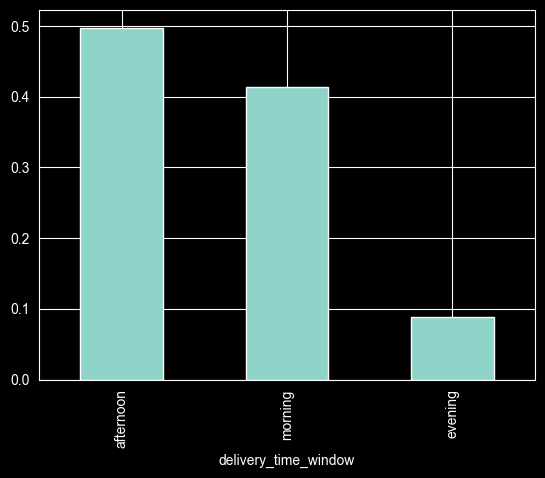

In [89]:
print("Target distribution")
df['delivery_time_window'].value_counts(normalize=True).plot(kind='bar')

In [90]:
print("Numeric features summary")
df[['distance', "parcel_weights", "sequence_in_delivery"]].describe()

Numeric features summary


,distance,parcel_weights,sequence_in_delivery
count,49906.000000,49982.000000,49915.000000
mean,81.933456,44.320061,49.726215
std,1480.639073,789.677201,28.574388
min,1.000000,0.500000,1.000000
25%,25.700000,12.810000,25.000000
50%,50.450000,25.250000,50.000000
75%,75.130000,37.470000,74.000000
max,98400.060000,49087.600000,99.000000


Categorical features summary


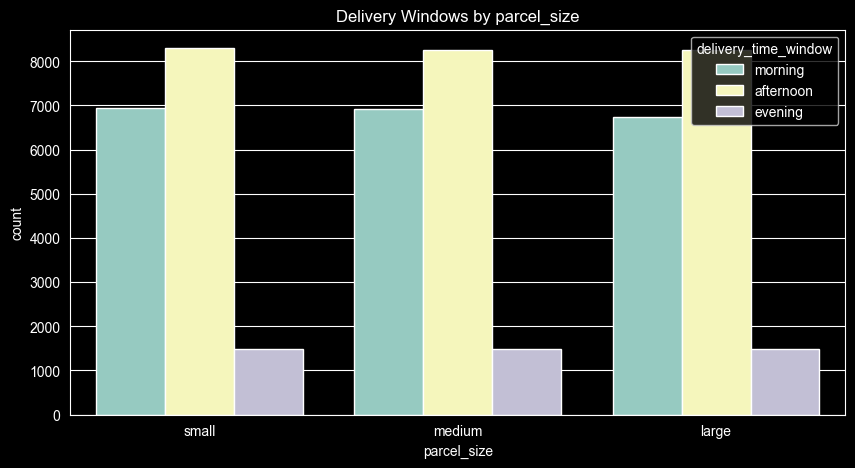

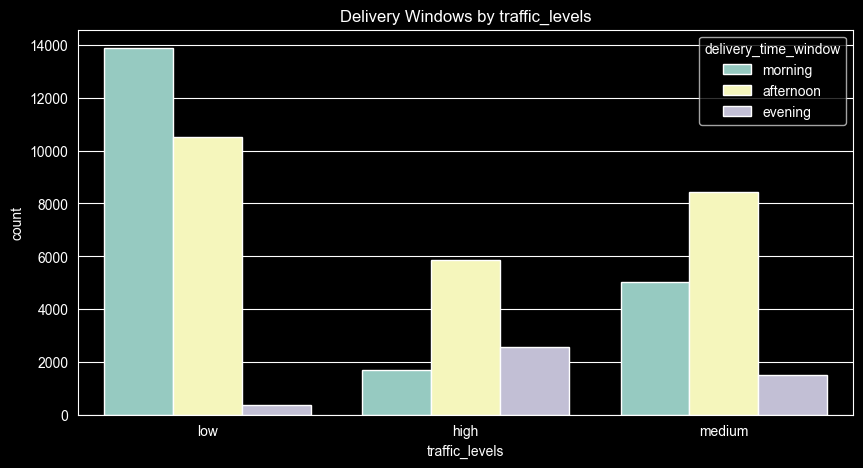

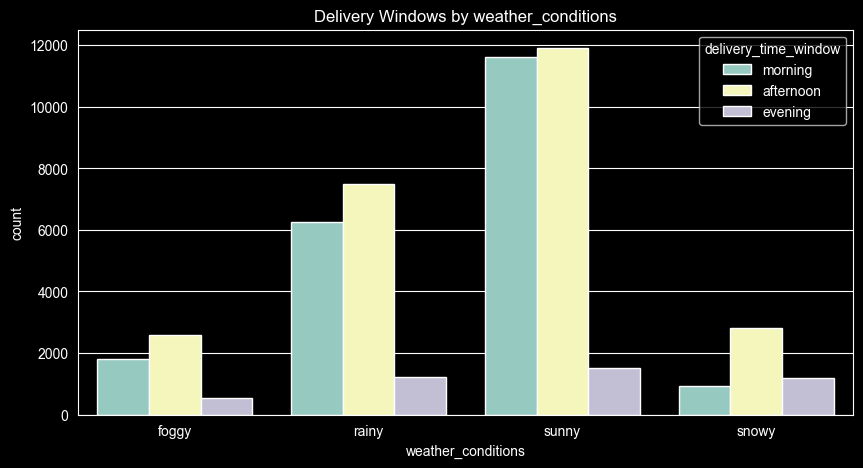

In [91]:
print("Categorical features summary")
for col in ["parcel_size", "traffic_levels", "weather_conditions"]:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, hue="delivery_time_window", data=df)
    plt.title(f"Delivery Windows by {col}")
    plt.show()

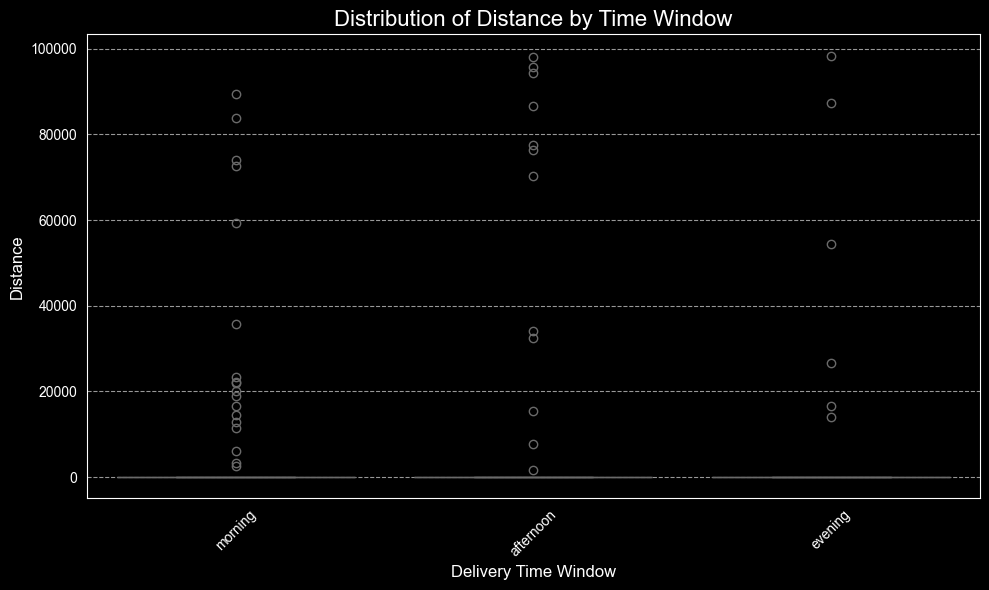

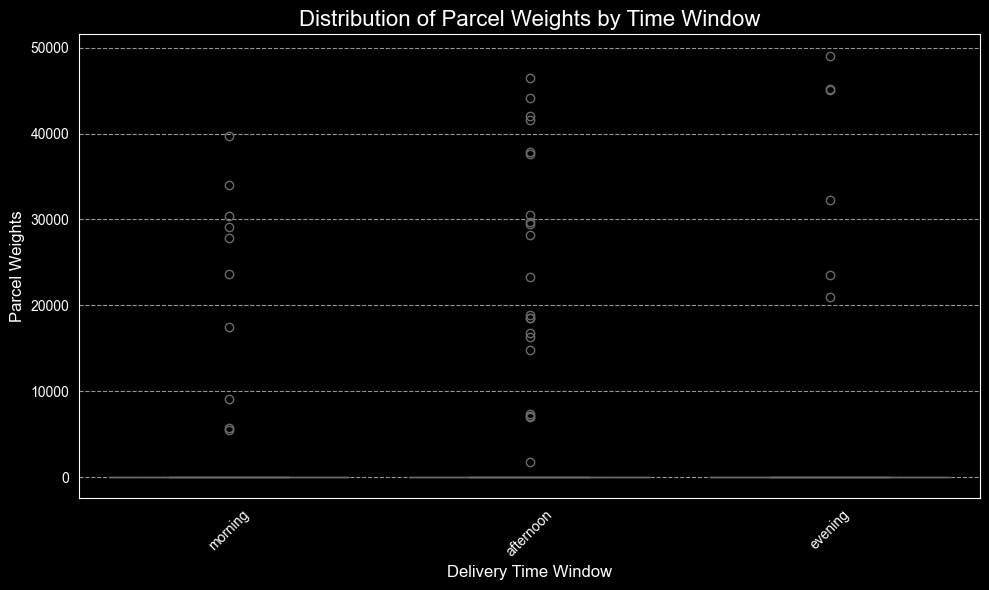

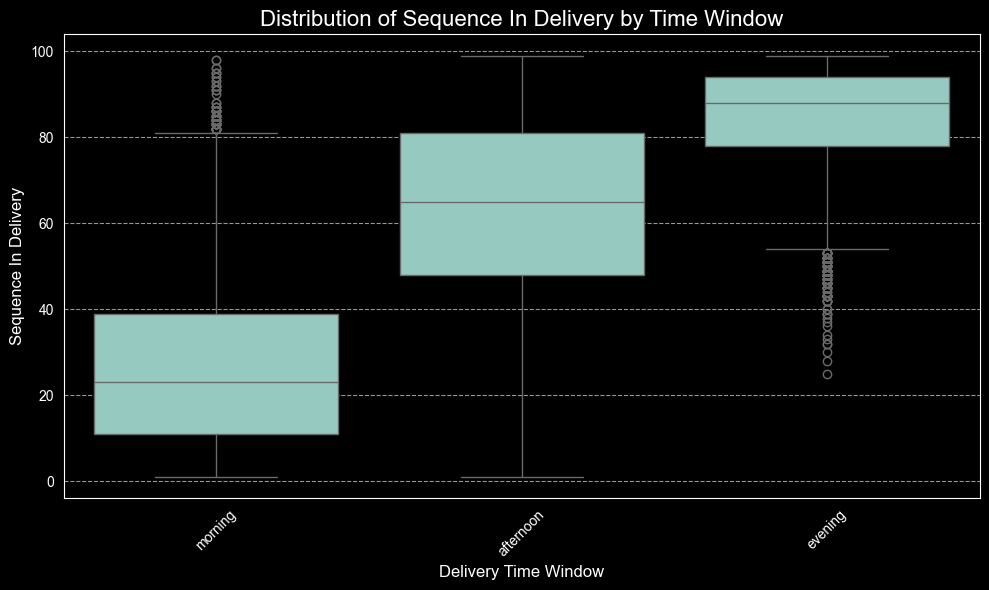

In [92]:
target = 'delivery_time_window'
numerical_features = ['distance', 'parcel_weights', 'sequence_in_delivery']

for feature in numerical_features:
    plt.style.use('dark_background')
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=target, y=feature, data=df)
    plt.title(f'Distribution of {feature.replace("_", " ").title()} by Time Window', fontsize=16)
    plt.xlabel('Delivery Time Window', fontsize=12)
    plt.ylabel(feature.replace("_", " ").title(), fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

In [93]:
df["month"] = df["dates"].dt.month
df["season"] = pd.cut(
    df["month"],
    bins=[0, 2, 5, 8, 11, 12],
    labels=["Winter", "Spring", "Summer", "Autumn", "Winter2"],
    include_lowest=True,
)
df.loc[df["season"] == "Winter2", "season"] = "Winter"
df["day_of_week"] = df["dates"].dt.day_name()
df["is_weekend"] = df["dates"].dt.dayofweek.isin([5, 6])

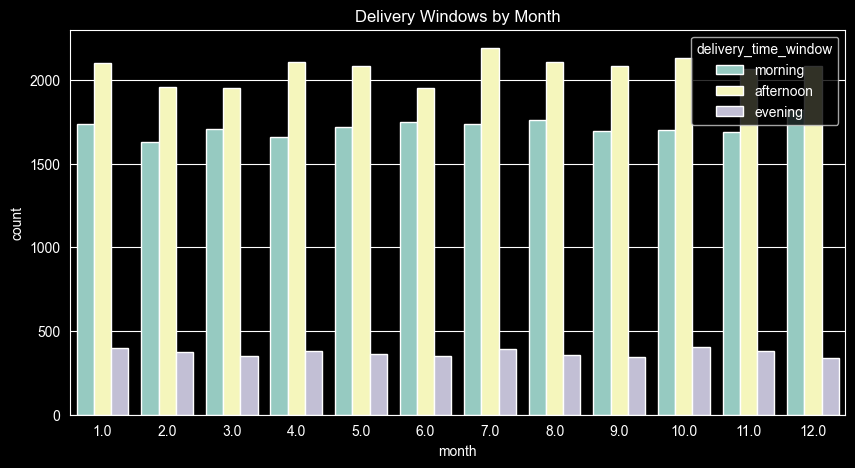

In [94]:
plt.figure(figsize=(10, 5))
sns.countplot(x="month", hue="delivery_time_window", data=df)
plt.title("Delivery Windows by Month")
plt.show()


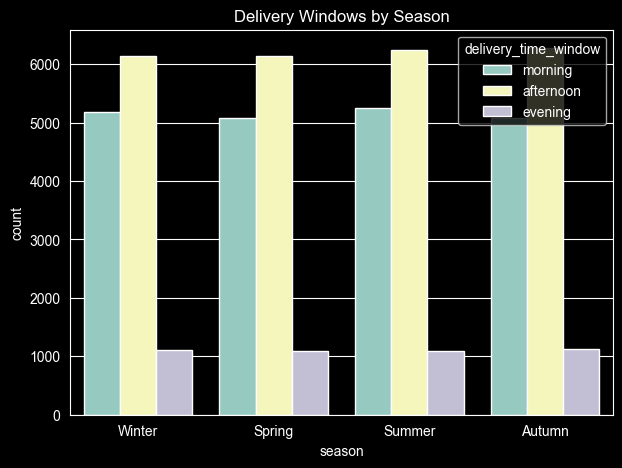

In [95]:
plt.figure(figsize=(7, 5))
sns.countplot(x="season", hue="delivery_time_window", data=df,
              order=["Winter", "Spring", "Summer", "Autumn"])
plt.title("Delivery Windows by Season")
plt.show()

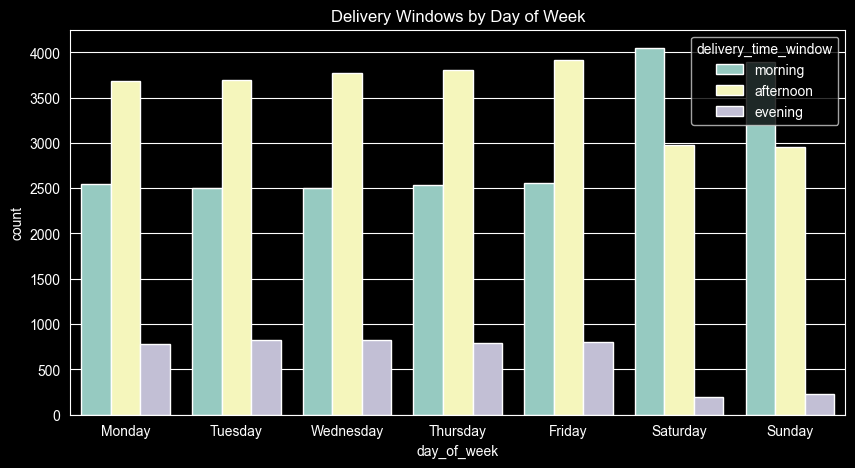

In [96]:
plt.figure(figsize=(10, 5))
sns.countplot(x="day_of_week", hue="delivery_time_window", data=df,
              order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.title("Delivery Windows by Day of Week")
plt.show()

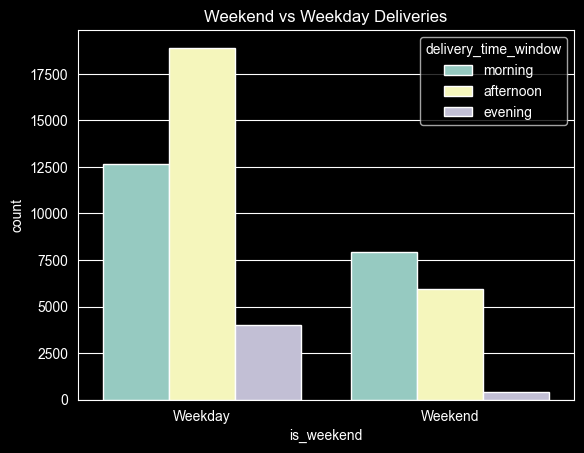

In [97]:
sns.countplot(x="is_weekend", hue="delivery_time_window", data=df)
plt.title("Weekend vs Weekday Deliveries")
plt.xticks([0, 1], ["Weekday", "Weekend"])
plt.show()

## Analysis of Delivery Time Windows


### Temporal Factors

Season and month do not appear to have a significant impact on when deliveries are scheduled.
The distinction between weekdays and weekends is important.
On weekdays, most deliveries occur in the afternoon, followed by the morning, and then the evening.
On weekends, the order of preference shifts to morning, followed by afternoon, and then evening.


### Delivery Characteristics

Parcel size seems to have no effect on the time window. The order of popularity remains consistently afternoon, morning, and then evening.
The overall distribution of deliveries is imbalanced, with a majority of deliveries taking place in the afternoon, followed by morning, and then evening.


### Sequence in Delivery

Morning deliveries show a wide range of sequence numbers, suggesting that morning routes are a mix of early and later stops.
Afternoon deliveries have a higher median sequence number and a tighter distribution, indicating they are typically later stops within a delivery route.
Evening deliveries have the highest median sequence number and the widest range, suggesting they are very late stops with high variability. The plots for Distance and Parcel Weights show no strong relationship, with values distributed similarly across all time windows.


### Environmental Factors

Traffic level has a noticeable impact.
With low traffic, the most common time window is morning.
With high or medium traffic, the most common time window is afternoon.
Weather conditions also play a role.
Foggy, rainy, and sunny weather all favor deliveries in the afternoon, followed by morning, and then evening.
Only snowy conditions change the order, making afternoon the most popular, followed by the evening, and then the morning.


## Conclusion

The exploratory analysis reveals that while temporal factors like day of the week and traffic conditions significantly influence delivery time windows,
other factors such as parcel size and distance do not show a strong relationship.
The problem is suitable for multi-class classification, with the target variable being the delivery time window.
The next step is to prepare the data, by removing the missing data and the outliers per target class, for modeling and train a classification model to predict delivery time windows based on the identified features.
Given the imbalanced nature of the target variable, techniques like oversampling will be employed to address this issue.
The model will be trained using a pipeline that includes preprocessing, oversampling, and classification steps, with hyperparameter tuning to optimize performance.
Random Forest Classifier will be used as the base model to establish a baseline because of its interpretability and ability to handle categorical and numerical
features effectively and provides feature importance which can be useful for further improvements.
The model will be evaluated using metrics such as F1-score, precision, and recall to ensure it performs well across all delivery time windows.
The model seems to fall a bit short in classifying the evening deliveries, which is likely due to the limited number of samples in that category and overlap with afternoon deliveries.
